<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Multiclass_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://www.kaggle.com/datasets/puneet6060/intel-image-classification

# UNZIP THE DATASET

In [ ]:
! unzip /content/https:/www.kaggle.com/datasets/puneet6060/intel-image-classification/intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

# **Import the Required Libraries**

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline

# Load the Image Training and Validation Datasets

In [ ]:
train_path = "/content/seg_train/seg_train"
test_path = "/content/seg_test/seg_test"

In [ ]:
os.listdir(train_path)

['buildings', 'glacier', 'street', 'mountain', 'forest', 'sea']

# **Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Train_Datagen = ImageDataGenerator(rescale = 1./255.0,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = "nearest")

Val_Datagen = ImageDataGenerator(rescale = 1./255.0)

In [ ]:
train_data = Train_Datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    batch_size = 32,
    class_mode = "categorical",
    shuffle = True)

Found 14034 images belonging to 6 classes.


In [ ]:
val_data = Val_Datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size = 32,
    class_mode = "categorical",
    shuffle = True)

Found 3000 images belonging to 6 classes.


In [ ]:
train_data.class_indices.items()

dict_items([('buildings', 0), ('forest', 1), ('glacier', 2), ('mountain', 3), ('sea', 4), ('street', 5)])

In [ ]:
classes = {value: key for key, value in train_data.class_indices.items()}
print(classes)
for key, value in classes.items():
  print(f"{key} :: {value}")

{0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}
0 :: buildings
1 :: forest
2 :: glacier
3 :: mountain
4 :: sea
5 :: street


# Ploting Sample Training Images

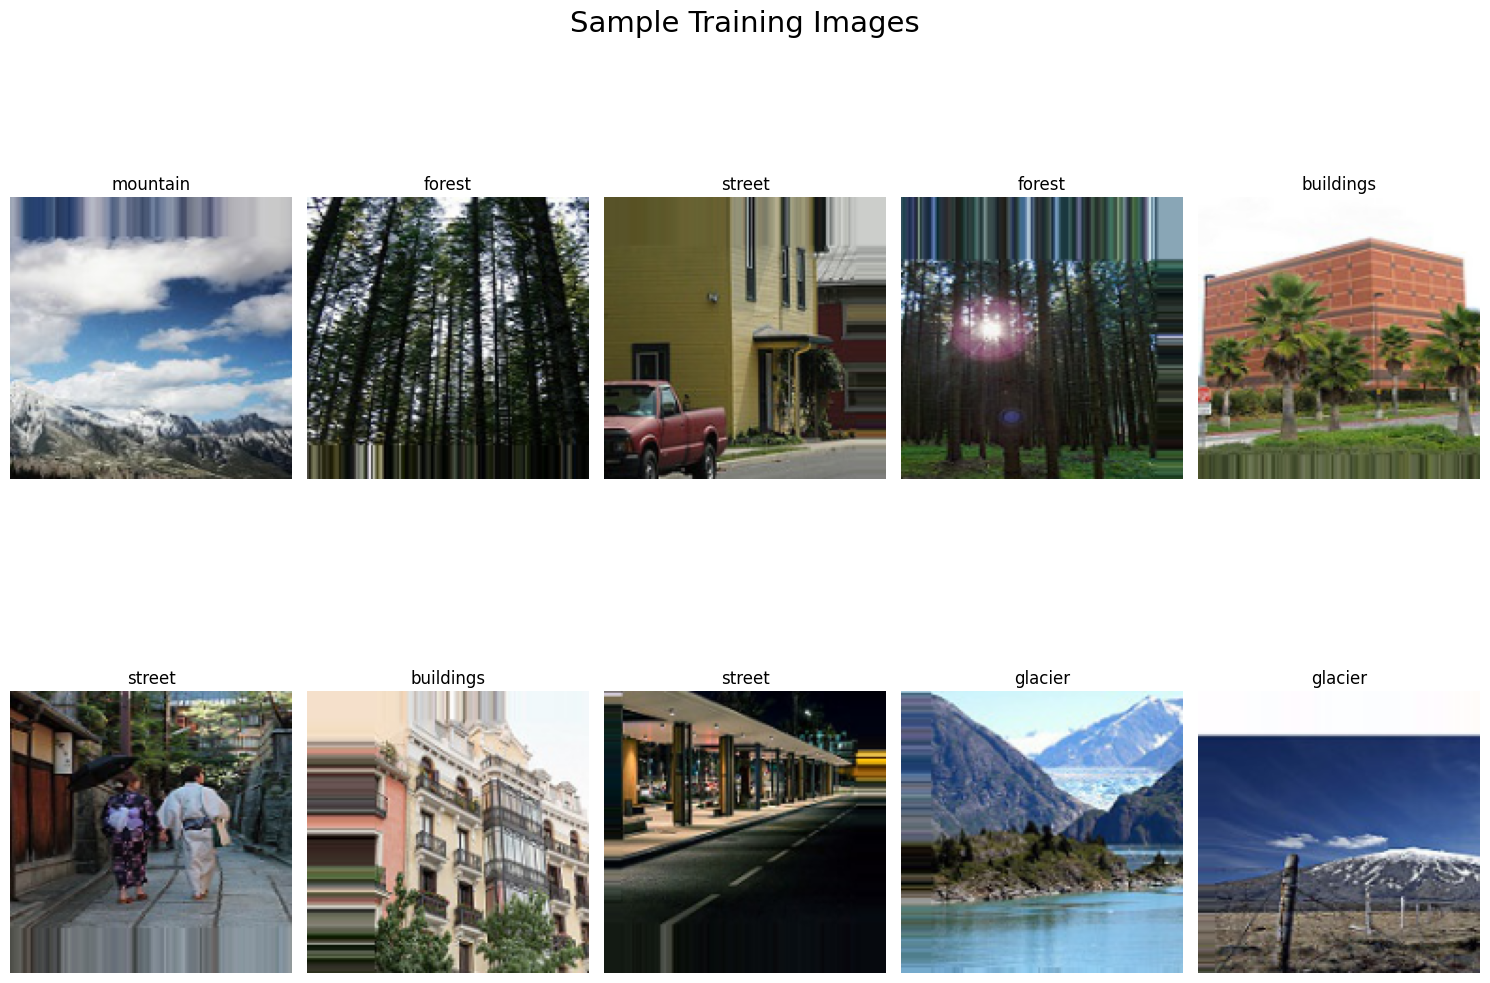

In [ ]:
X, ax = plt.subplots(2, 5, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(5):
        cls = classes[np.argmax(train_data[0][1][idx])]
        ax[i, j].set_title(f"{cls}")
        ax[i, j].imshow(train_data[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

# ***Create CNN Model***

In [ ]:
def my_model():
  model = tf.keras.Sequential([
    keras.layers.Conv2D(128, (5,5), padding = "valid", activation = "relu", input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(64, (3,3), padding = "valid", kernel_regularizer = l2(0.00005), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(32, (3,3), padding = "valid", kernel_regularizer = l2(0.00005), activation = "relu"),
    keras.layers.MaxPooling2D(pool_size = (2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),

    keras.layers.Dense(256, activation = "relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(6, activation = "softmax")])
  return model

In [ ]:
model = my_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 73, 73, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                        

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = "val_loss", factor = np.sqrt(0.1), patience = 5)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = "CategoricalCrossentropy",
    metrics = ["accuracy"])

In [ ]:
history = model.fit(train_data, epochs = 50, validation_data = val_data, callbacks = [reduce_lr])

Epoch 1/50
439/439 [==============================] - 114s 225ms/step - loss: 2.0701 - accuracy: 0.4846 - val_loss: 1.7639 - val_accuracy: 0.4003 - lr: 0.0010
Epoch 2/50
439/439 [==============================] - 97s 221ms/step - loss: 1.1099 - accuracy: 0.6018 - val_loss: 1.0714 - val_accuracy: 0.6097 - lr: 0.0010
Epoch 3/50
439/439 [==============================] - 97s 221ms/step - loss: 0.9564 - accuracy: 0.6409 - val_loss: 0.9908 - val_accuracy: 0.6603 - lr: 0.0010
Epoch 4/50
439/439 [==============================] - 96s 219ms/step - loss: 0.8697 - accuracy: 0.6822 - val_loss: 1.2167 - val_accuracy: 0.5693 - lr: 0.0010
Epoch 5/50
439/439 [==============================] - 98s 222ms/step - loss: 0.8222 - accuracy: 0.7033 - val_loss: 0.6956 - val_accuracy: 0.7490 - lr: 0.0010
Epoch 6/50
439/439 [==============================] - 96s 219ms/step - loss: 0.7616 - accuracy: 0.7267 - val_loss: 0.6123 - val_accuracy: 0.7753 - lr: 0.0010
Epoch 7/50
439/439 [==============================]

# ***Evaluate My Model***

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

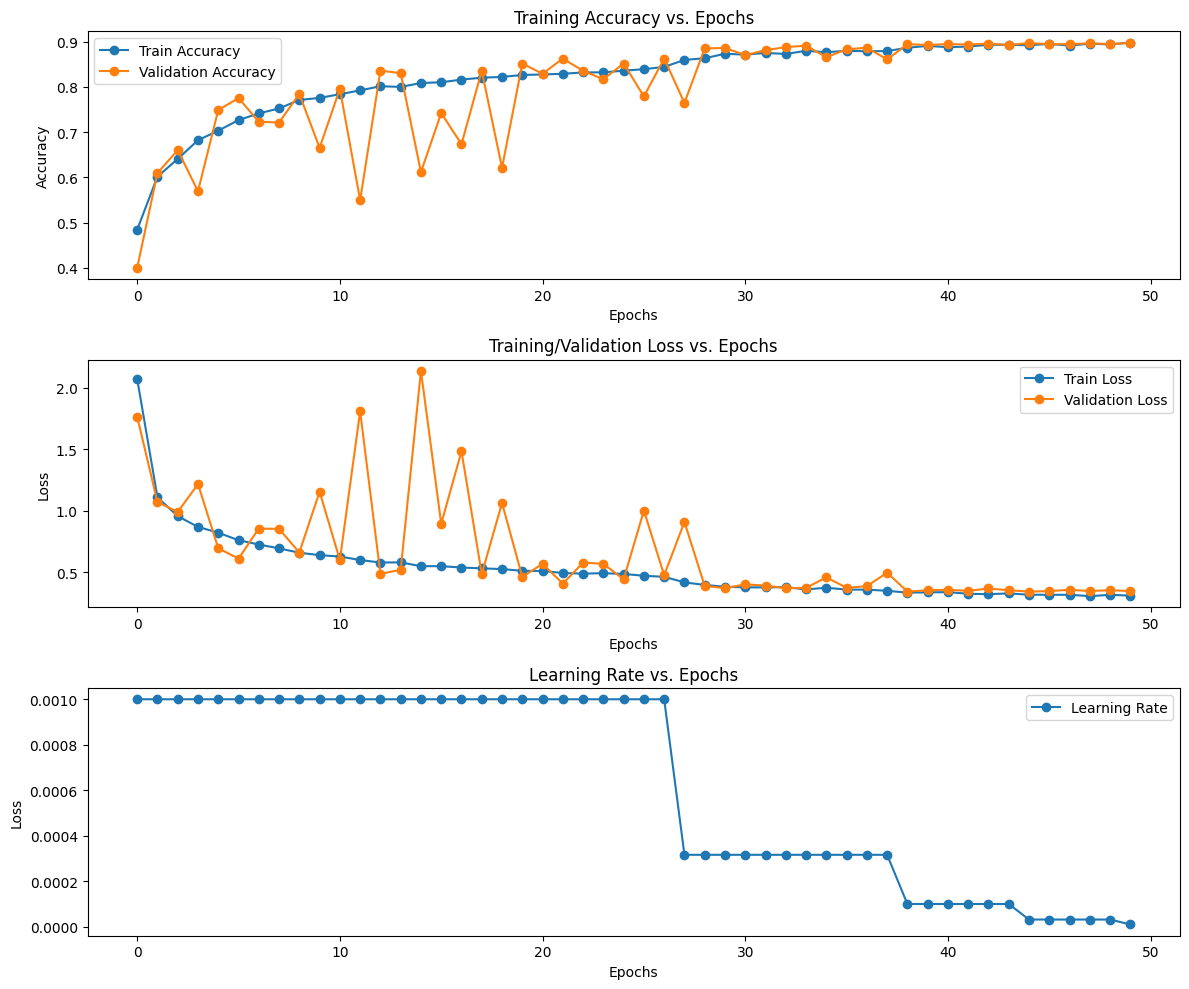

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

# ***Model Prediction on the Test Dataset***

In [ ]:
test_data = Val_Datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size = 32,
    class_mode = "categorical",
    shuffle = False)

Found 3000 images belonging to 6 classes.


In [ ]:
predictions = model.predict(test_data)

94/94 [==============================] - 9s 90ms/step


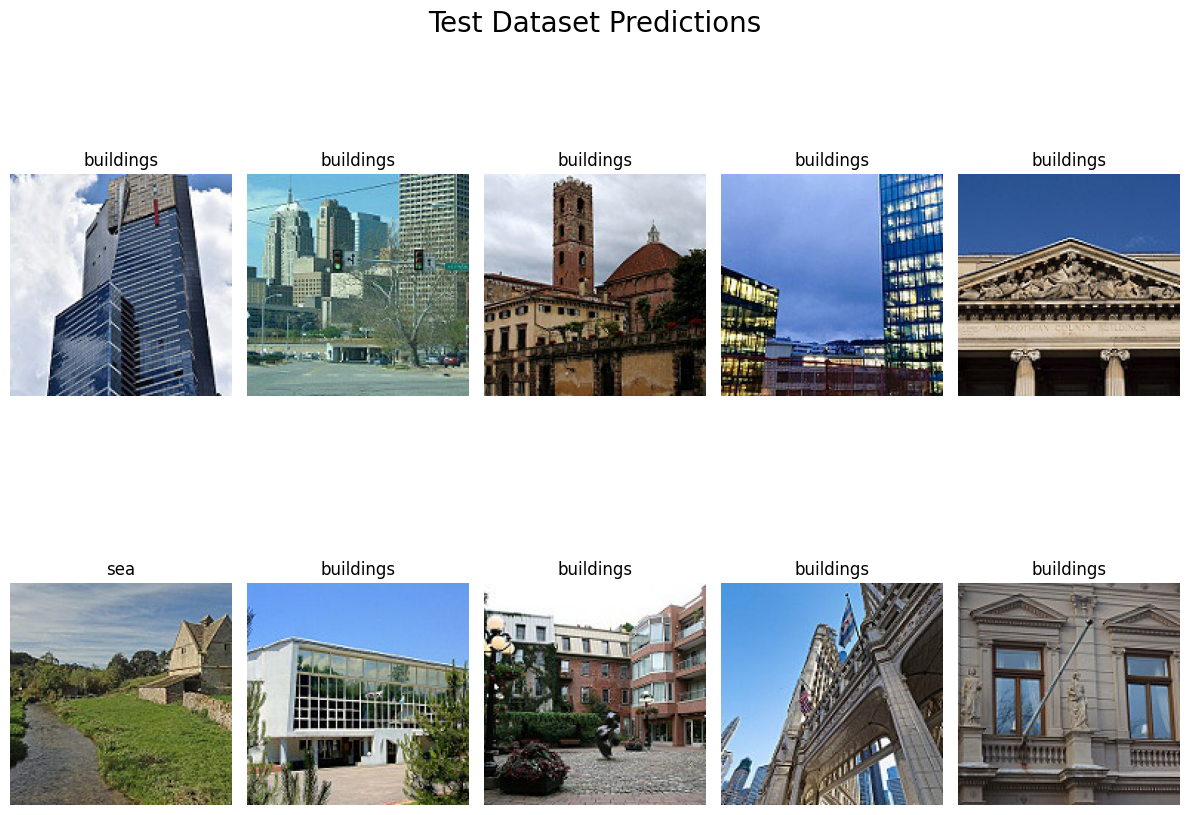

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = classes[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_data[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()